In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.data.shape)

(150, 4)


In [4]:
n_samples, n_features = iris.data.shape
print (n_samples)

150


In [5]:
print(n_features)

4


In [6]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [7]:
print(iris.target.shape)

(150,)


In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [12]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [13]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
model.coef_

array([1.])

In [16]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


In [18]:
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()

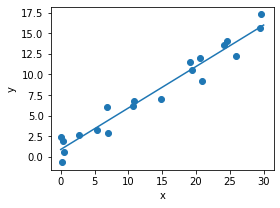

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

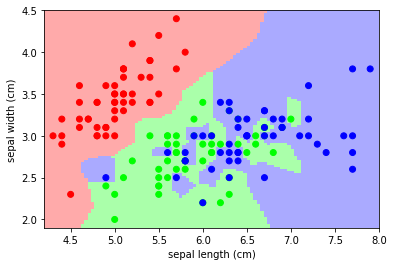

In [27]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

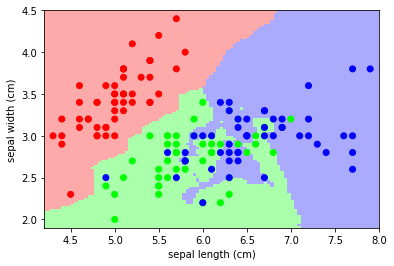

In [28]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)

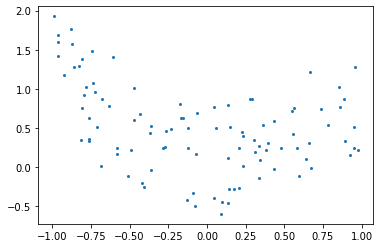

In [30]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)


Text(0.5, 1.0, 'Fitting a 4th and a 9th order polynomial')

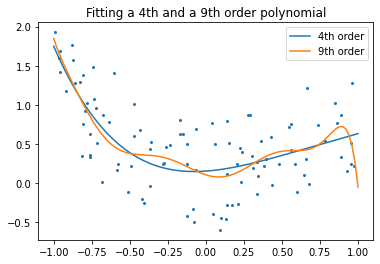

In [31]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

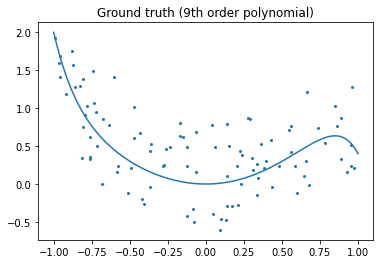

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

plt.show()

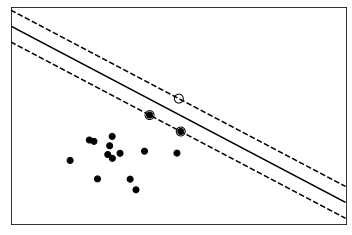

In [34]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import svm
def linear_model(rseed=42, n_samples=30):
    " Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[:n_samples // 2] -= 15
    data[n_samples // 2:] += 15

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = -1

    return data, labels


X, y = linear_model()
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(111, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone)

ax.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])

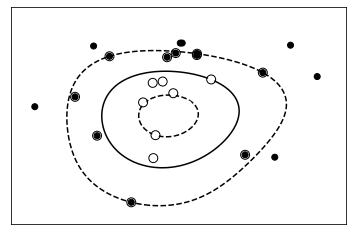

In [35]:
def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


X, y = nonlinear_model()
clf = svm.SVC(kernel='rbf', gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone, zorder=2)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

plt.show()

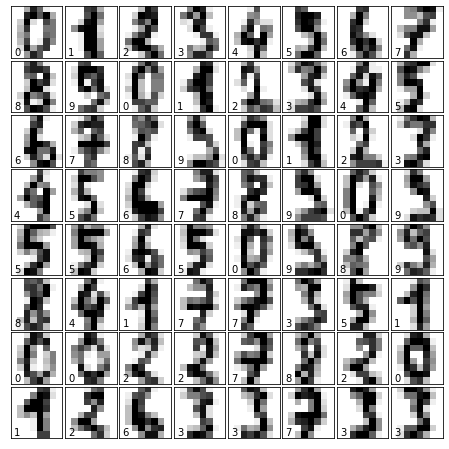

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

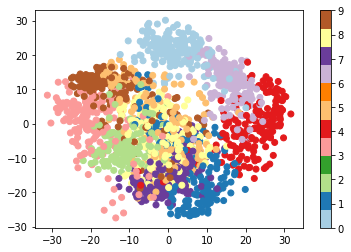

In [38]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

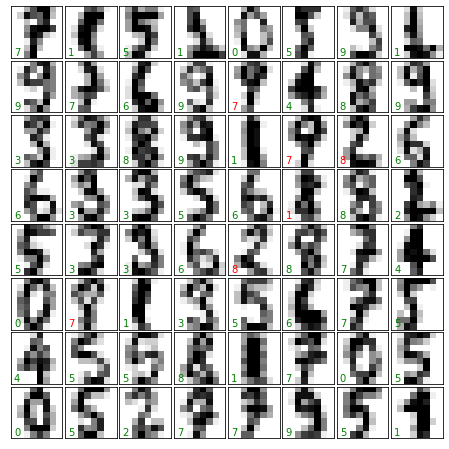

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [40]:
matches = (predicted == expected)
print(matches.sum())

394


In [41]:
print(len(matches))

450


In [42]:
matches.sum() / float(len(matches))

0.8755555555555555

In [43]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.75      0.93      0.83        42
           2       0.92      0.85      0.88        39
           3       0.91      0.87      0.89        45
           4       0.95      0.86      0.90        42
           5       0.91      0.91      0.91        55
           6       0.98      0.98      0.98        46
           7       0.77      0.98      0.86        41
           8       0.69      0.76      0.72        41
           9       0.97      0.64      0.77        44

    accuracy                           0.88       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.89      0.88      0.88       450



In [44]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[53  0  0  0  0  1  0  0  1  0]
 [ 0 39  1  0  0  0  0  0  2  0]
 [ 0  1 33  0  0  0  0  0  5  0]
 [ 0  0  1 39  0  3  0  2  0  0]
 [ 0  0  0  0 36  0  0  4  2  0]
 [ 0  0  0  0  0 50  1  2  1  1]
 [ 0  0  1  0  0  0 45  0  0  0]
 [ 0  0  0  0  1  0  0 40  0  0]
 [ 0  8  0  0  0  1  0  1 31  0]
 [ 1  4  0  4  1  0  0  3  3 28]]


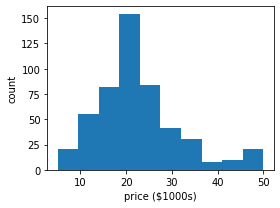

In [45]:
from sklearn.datasets import load_boston
data = load_boston()
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

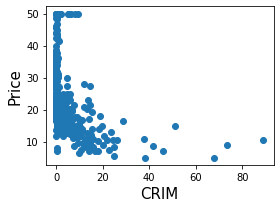

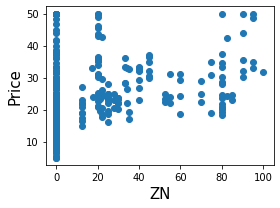

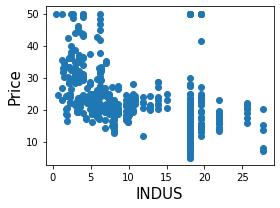

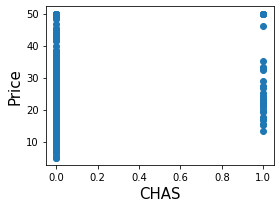

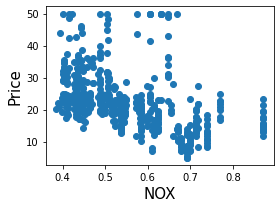

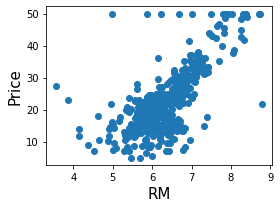

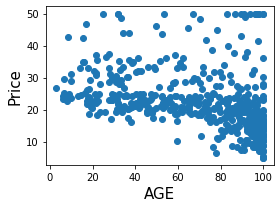

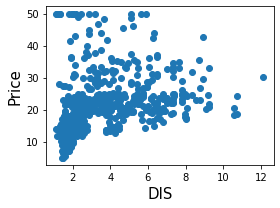

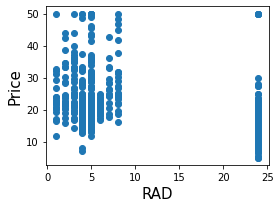

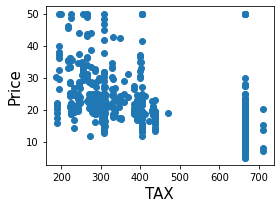

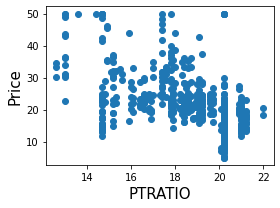

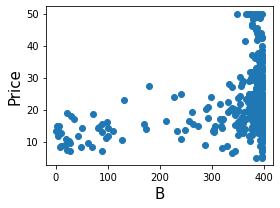

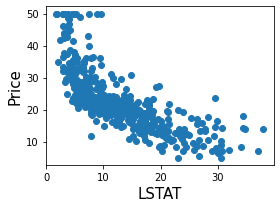

In [46]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

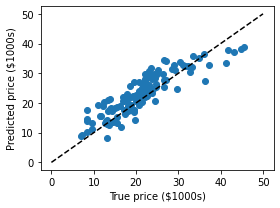

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

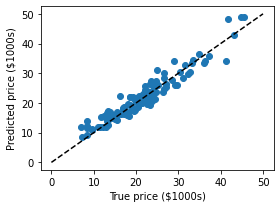

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [49]:
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()


RMS: 2.3635052916832615 


In [50]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__,
                      cross_val_score(model, X, y).mean()))

Ridge: 0.4101758336587286
Lasso: 0.3375597834274946


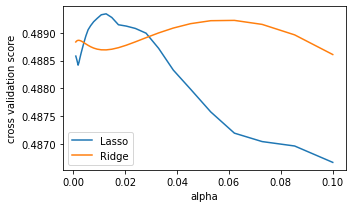

In [54]:
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()